In [243]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
 
from adjustText import adjust_text

In [244]:
def visualize_latent_factors(V, ids, titles, plot_title):
    
    points = V[ids, :]
    
    # plt.figure(figsize=(12, 10))
    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.scatter(points[:, 0], points[:, 1], s=100, alpha=0.7)
    
    texts = []
    for i, (x, y) in enumerate(points):
        short_title = titles[ids[i]][:25] + '...' if len(titles[ids[i]]) > 25 else titles[ids[i]]
        texts.append(ax.text(x, y, short_title, ha='center', va='center', weight=400, fontsize = 6))
        # ax.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))
        # plt.annotate(short_title, (x, y), fontsize=9, xytext=(5, 5), textcoords='offset points')
    adjust_text(texts, arrowprops={'arrowstyle': '-', 'color': 'black'})
    
    plt.title(plot_title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True, linestyle='--', alpha=0.7)
    # plt.xlim(0, 2)
    # plt.ylim(-2, 2)
    
    plt.show()

In [245]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
movies_df = pd.read_csv('../data/movies.csv', encoding='latin-1')

In [246]:
movies_df

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
movie_titles = {int(row['Movie ID']) - 1: row['Movie Title'] for _, row in movies_df.iterrows()}

subset = movies_df[movies_df["Childrens"] == 1]
ids = (subset['Movie ID'] - 1).head(20).tolist()
    
#ids = range(10)

In [248]:
print(ids)

[0, 7, 34, 62, 70, 77, 90, 93, 94, 98, 101, 102, 111, 131, 137, 138, 139, 140, 141, 150]


In [249]:
from sklearn.preprocessing import StandardScaler

# V = np.load("scratch_bias.npy")
V = np.load("../data/naive_bias.npy")
print(V.shape)
sc = StandardScaler(with_std=False)
svd = TruncatedSVD(n_components=2, n_iter=20)
V = sc.fit_transform(V)
V = svd.fit_transform(V)
print(V.shape)

(1682, 20)
(1682, 2)


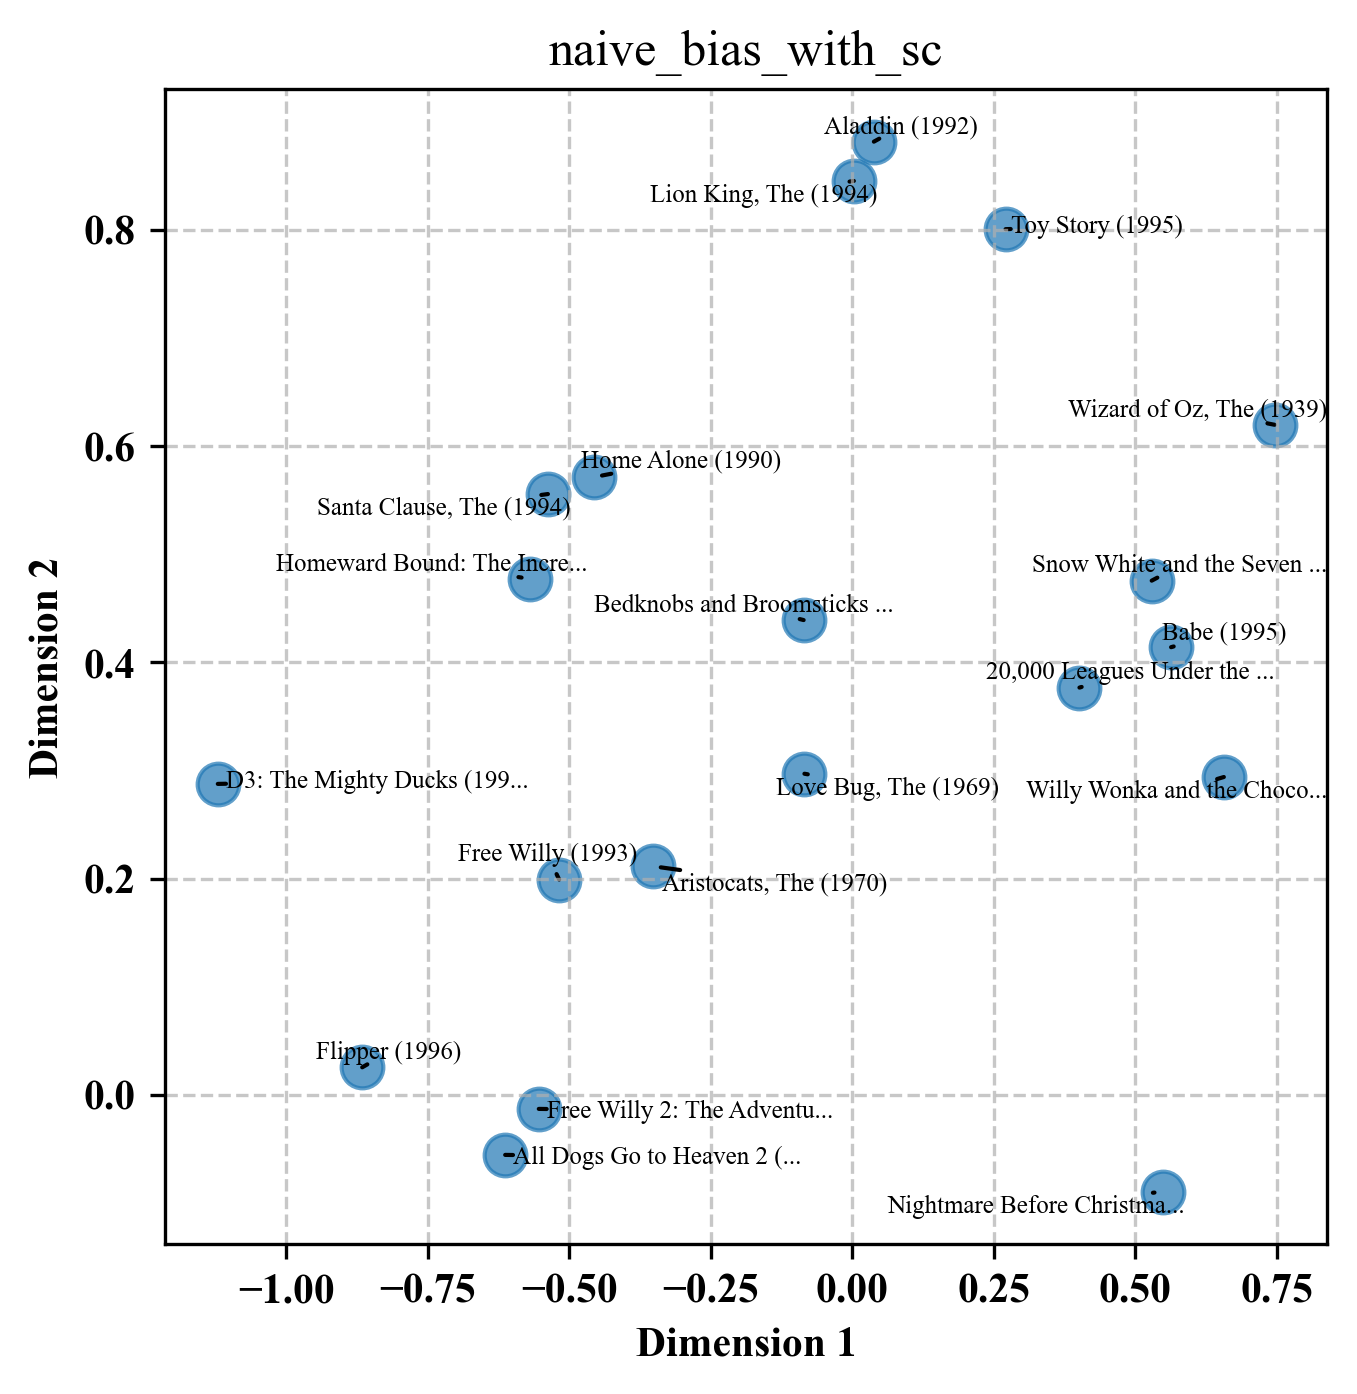

In [250]:
visualize_latent_factors(V, ids, movie_titles, "naive_bias_with_sc")